<a href="https://colab.research.google.com/github/bukenalen30/UAS-BDPAL/blob/main/Final_UAS_BDPAL_Kelompok_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***KELOMPOK 3***

WAHYUTRI NUR ROHMAN 22.11.5223

HEKAL AJI NUGROHO 22.11.5210

MUHNISA APRILLIA SARI 22.11.5255

ZENIC BELPHA ALENSY 22.11.5128

***A. Pilih satu bidang yang Anda beserta rekan tim minati, jabarkan alasan pemilihan bidang tersebut dan jelaskan apa yang ingin dicapai dengan memilih topik ini.***

Kami memilih bidang analisis hubungan gaya hidup sehari-hari dengan risiko penyakit hati karena relevansinya yang tinggi terhadap masalah kesehatan masyarakat saat ini. Gaya hidup tidak sehat, seperti konsumsi alkohol berlebihan, pola makan tinggi lemak, kurangnya aktivitas fisik, dan kebiasaan merokok, menjadi penyebab utama meningkatnya prevalensi penyakit hati. Penyakit hati sering kali berkembang tanpa gejala yang jelas dalam jangka waktu lama, sehingga penting untuk memahami faktor-faktor yang dapat dicegah melalui perubahan kebiasaan sehari-hari.

Dengan topik ini, kami ingin menganalisis data untuk mengidentifikasi kebiasaan gaya hidup yang paling berisiko, seperti konsumsi alkohol atau kurangnya olahraga, dan mengembangkan model prediktif yang dapat memperkirakan kemungkinan seseorang menderita penyakit hati berdasarkan pola hidup mereka. Hasil analisis ini juga dapat digunakan untuk membuat segmentasi risiko populasi, sehingga intervensi preventif dapat lebih efektif dan tepat sasaran.

Selain itu, kami berharap wawasan dari penelitian ini dapat digunakan untuk meningkatkan kesadaran masyarakat akan pentingnya menjalani pola hidup sehat. Kami juga ingin merancang sistem rekomendasi sederhana untuk membantu individu mengadopsi kebiasaan sehat yang dapat mengurangi risiko penyakit hati. Dengan pendekatan ini, kami berharap dapat berkontribusi pada upaya pencegahan penyakit hati sekaligus meningkatkan kualitas hidup masyarakat secara keseluruhan.

***B. Ceritakan proses mendapatkan data dan informasi lengkap mengenai data tersebut (seperti waktu, penjelasan setiap kolom, sumber dll). Data yang digunakan harus data terbaru dengan range 1-4 tahun kebelakang.***

Dataset *"Predict Liver Disease: 1700 Records Dataset"* dirilis 7 bulan yang lalu di platform Kaggle oleh Rabie El Kharoua untuk tujuan edukasi dan pengembangan model prediktif di bidang kesehatan. Dataset ini bersifat sintetis namun dirancang untuk merefleksikan pola dunia nyata, sehingga aman digunakan tanpa melanggar privasi. Dengan ukuran 1.500 catatan, dataset ini mencakup 11 variabel yang mencerminkan faktor demografis, gaya hidup, dan indikator kesehatan, seperti usia, jenis kelamin, indeks massa tubuh (BMI), konsumsi alkohol, kebiasaan merokok, aktivitas fisik, hingga hasil uji fungsi hati.

Dataset ini telah melalui tahap preprocessing untuk memastikan data bersih dan siap analisis, sehingga pengguna dapat langsung fokus pada pengembangan model atau penelitian. Tujuan utama dari dataset ini adalah untuk mendukung analisis hubungan antara gaya hidup dan risiko penyakit hati, menciptakan wawasan baru, serta membantu pengembangan langkah pencegahan yang lebih personal. Meskipun bersifat sintetis, dataset ini sangat relevan untuk penelitian terkini, terutama dalam memahami faktor risiko penyakit hati dan membangun sistem prediksi yang lebih baik.

berikut link adri dataset yang digunakan : https://www.kaggle.com/datasets/rabieelkharoua/predict-liver-disease-1700-records-dataset

# ***IMPORT LIBRARY Dan LOAD DATA***

In [ ]:
!pip install catboost
!pip install "dask[dataframe]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.2 MB/s eta 0:00:00


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnan, when, count
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, classification_report

In [ ]:
# 1. Membuat SparkSession
spark = SparkSession.builder.appName("Liver Disease Analysis").getOrCreate()

In [ ]:
# 2. Load file data
file_path = "/content/Liver_disease_data.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
data.show(5)

+---+------+------------------+------------------+-------+-----------+------------------+--------+------------+------------------+---------+
|Age|Gender|               BMI|AlcoholConsumption|Smoking|GeneticRisk|  PhysicalActivity|Diabetes|Hypertension| LiverFunctionTest|Diagnosis|
+---+------+------------------+------------------+-------+-----------+------------------+--------+------------+------------------+---------+
| 58|     0|35.857584148869186| 17.27282842593232|      0|          1|0.6589401821191965|       0|           0| 42.73424003122099|        1|
| 71|     1|30.732470150268405|2.2012656840223044|      0|          1| 1.670556694687857|       1|           0| 67.30982160011246|        1|
| 48|     0|19.971406944382398| 18.50094350686029|      0|          0|  9.92830825444697|       0|           0|63.738955838709444|        0|
| 34|     1|16.615416996102155|12.632870301657832|      0|          0| 5.630129431716631|       0|           0| 64.55587349026104|        1|
| 62|     1| 

# ***Proses EDA***

***C. Gunakan exploratory data analysis (EDA) untuk melihat sudut padang yang ada mengenai data (minimal 4) dua diantaranya bar dan pie chart, 2 diantaranya bebas. Berikan penjelasan.***

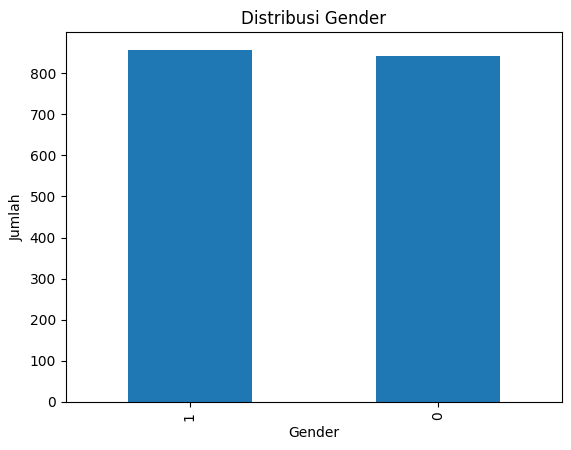

In [ ]:
# a. Bar chart
# Male (0) or Female (1)

# Convert the Spark DataFrame 'data' to a pandas DataFrame
pandas_df = data.toPandas()

pandas_df['Gender'].value_counts().plot(kind='bar', title='Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

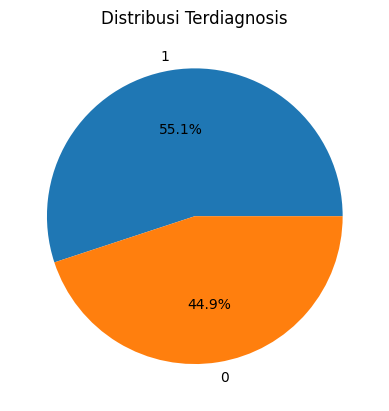

In [ ]:
# b. Pie chart
pandas_df['Diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribusi Terdiagnosis')
plt.ylabel('')
plt.show()

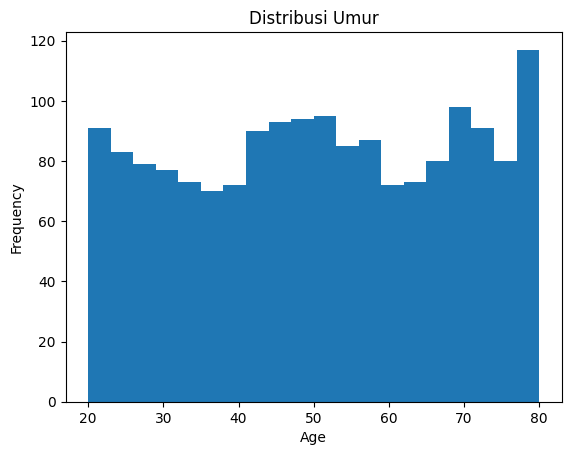

In [ ]:
# c. Histogram
pandas_df['Age'].plot(kind='hist', bins=20, title='Distribusi Umur')
plt.xlabel('Age')
plt.show()

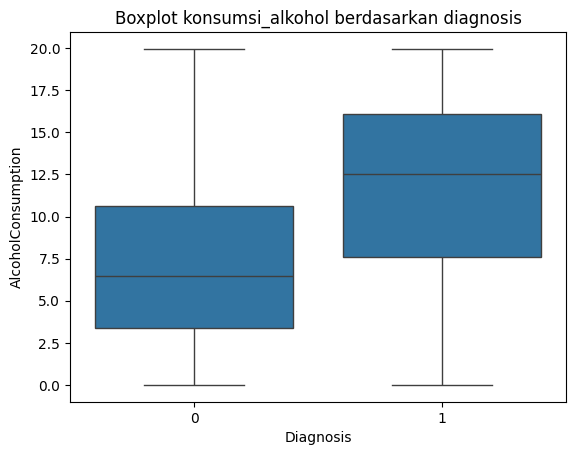

In [ ]:
# d. Boxplot
sns.boxplot(x='Diagnosis', y='AlcoholConsumption', data=pandas_df)
plt.title('Boxplot konsumsi_alkohol berdasarkan diagnosis')
plt.show()

# ***Proses Preprosesing Data***



***D. Lakukan pre-processing data dengan memeriksa tipe data, mengganti nama kolom, memeriksa nilai null, mengubah tipe data (agar bisa di proses), menampilkan summary, dan menampilkan matriks korelasinya menggunakan metode metode yang pernah dipelajari.***

In [ ]:
# Menampilkan tipe data
data.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- AlcoholConsumption: double (nullable = true)
 |-- Smoking: integer (nullable = true)
 |-- GeneticRisk: integer (nullable = true)
 |-- PhysicalActivity: double (nullable = true)
 |-- Diabetes: integer (nullable = true)
 |-- Hypertension: integer (nullable = true)
 |-- LiverFunctionTest: double (nullable = true)
 |-- Diagnosis: integer (nullable = true)



In [ ]:
# Membuat mapping nama kolom ke dalam bahasa Indonesia
columns_mapping = {
    'Age': 'umur',
    'Gender': 'jenis_kelamin',
    'BMI': 'indeks_massa_tubuh',
    'AlcoholConsumption': 'konsumsi_alkohol',
    'Smoking': 'merokok',
    'GeneticRisk': 'risiko_genetik',
    'PhysicalActivity': 'aktivitas_fisik',
    'Diabetes': 'diabetes',
    'Hypertension': 'hipertensi',
    'LiverFunctionTest': 'tes_fungsi_hepar',
    'Diagnosis': 'diagnosis'
}

# Mengganti nama kolom sesuai dengan mapping
data = data.select([col(k).alias(columns_mapping[k]) for k in data.columns])

# Menampilkan 5 baris pertama untuk memverifikasi perubahan
data.show(5)

+----+-------------+------------------+------------------+-------+--------------+------------------+--------+----------+------------------+---------+
|umur|jenis_kelamin|indeks_massa_tubuh|  konsumsi_alkohol|merokok|risiko_genetik|   aktivitas_fisik|diabetes|hipertensi|  tes_fungsi_hepar|diagnosis|
+----+-------------+------------------+------------------+-------+--------------+------------------+--------+----------+------------------+---------+
|  58|            0|35.857584148869186| 17.27282842593232|      0|             1|0.6589401821191965|       0|         0| 42.73424003122099|        1|
|  71|            1|30.732470150268405|2.2012656840223044|      0|             1| 1.670556694687857|       1|         0| 67.30982160011246|        1|
|  48|            0|19.971406944382398| 18.50094350686029|      0|             0|  9.92830825444697|       0|         0|63.738955838709444|        0|
|  34|            1|16.615416996102155|12.632870301657832|      0|             0| 5.630129431716631|

In [ ]:
# Memeriksa nilai null
null_counts = data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns])
null_counts.show()

+----+-------------+------------------+----------------+-------+--------------+---------------+--------+----------+----------------+---------+
|umur|jenis_kelamin|indeks_massa_tubuh|konsumsi_alkohol|merokok|risiko_genetik|aktivitas_fisik|diabetes|hipertensi|tes_fungsi_hepar|diagnosis|
+----+-------------+------------------+----------------+-------+--------------+---------------+--------+----------+----------------+---------+
|   0|            0|                 0|               0|      0|             0|              0|       0|         0|               0|        0|
+----+-------------+------------------+----------------+-------+--------------+---------------+--------+----------+----------------+---------+



In [ ]:
# Menampilkan ringkasan data
data.describe().show()

+-------+------------------+------------------+------------------+--------------------+-------------------+------------------+--------------------+------------------+-------------------+------------------+------------------+
|summary|              umur|     jenis_kelamin|indeks_massa_tubuh|    konsumsi_alkohol|            merokok|    risiko_genetik|     aktivitas_fisik|          diabetes|         hipertensi|  tes_fungsi_hepar|         diagnosis|
+-------+------------------+------------------+------------------+--------------------+-------------------+------------------+--------------------+------------------+-------------------+------------------+------------------+
|  count|              1700|              1700|              1700|                1700|               1700|              1700|                1700|              1700|               1700|              1700|              1700|
|   mean| 50.39411764705882|0.5041176470588236|27.699801478712146|   9.832309483254367| 0.2917647058

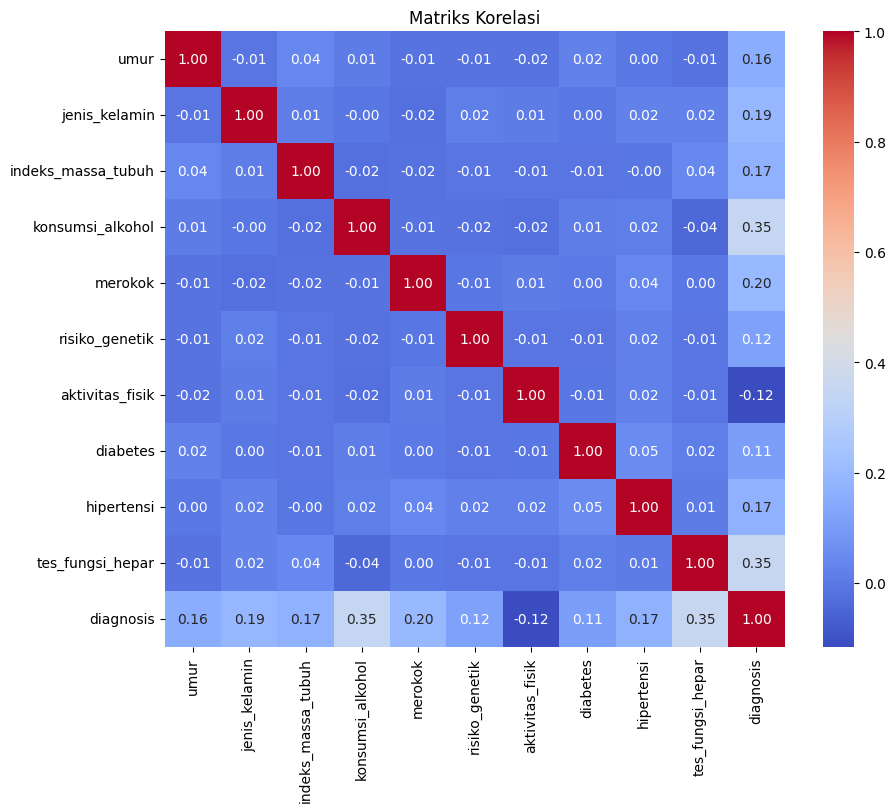

In [ ]:
# Menampilkan matriks korelasi
pandas_df = data.toPandas()
korelasi = pandas_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriks Korelasi")
plt.show()

In [ ]:
# Hilangkan baris dengan nilai NaN di dataset
pandas_df = pandas_df.dropna()

# Pilih semua fitur kecuali kolom target ('diagnosis') sebagai X
X = pandas_df.drop(columns=['diagnosis'])

# Tetapkan kolom target sebagai y
y = pandas_df['diagnosis']

# Periksa hasil akhir
print("Fitur yang digunakan:", X.columns.tolist())
print("Dimensi matriks X:", X.shape)
print("Dimensi label y:", y.shape)


Fitur yang digunakan: ['umur', 'jenis_kelamin', 'indeks_massa_tubuh', 'konsumsi_alkohol', 'merokok', 'risiko_genetik', 'aktivitas_fisik', 'diabetes', 'hipertensi', 'tes_fungsi_hepar']
Dimensi matriks X: (1700, 10)
Dimensi label y: (1700,)


In [ ]:
# Normalisasi data
scaler = StandardScaler()
selected_features = X.columns.tolist()
X = pd.DataFrame(scaler.fit_transform(X), columns=selected_features)

***E. Berdasarkan analisis data tersebut, jelaskan alasan pemilihan kolom/fitur yang relevan untuk menyelesaikan permasalahan yang ingin dicapai.***

Pemilihan kolom dalam dataset ini dilakukan untuk memastikan bahwa semua fitur yang digunakan relevan dalam memahami dan memprediksi risiko penyakit hati. **Umur** dipilih karena penyakit hati sering berkembang seiring bertambahnya usia, terutama pada individu dengan kondisi kesehatan tertentu. **Jenis kelamin** juga penting, karena perbedaan biologis antara laki-laki dan perempuan dapat memengaruhi kerentanan terhadap penyakit hati, seperti pengaruh hormon atau pola konsumsi alkohol. **Indeks Massa Tubuh (BMI)** mencerminkan risiko obesitas, yang merupakan salah satu penyebab utama penyakit hati berlemak non-alkoholik (NAFLD). Selain itu, **konsumsi alkohol** menjadi faktor utama karena alkohol berlebihan dapat langsung merusak hati dan menyebabkan sirosis.

Kebiasaan **merokok** juga dipertimbangkan, meskipun pengaruhnya tidak sebesar alkohol, namun dapat memperburuk fungsi hati dengan meningkatkan stres oksidatif. **Risiko genetik** adalah aspek penting lainnya, karena beberapa orang secara bawaan lebih rentan terhadap penyakit hati tertentu. Sementara itu, **aktivitas fisik** membantu menjaga berat badan sehat dan mengurangi risiko penumpukan lemak di hati, sehingga menjadi faktor pencegah penting.

Fitur **diabetes** dan **hipertensi** dipilih karena keduanya merupakan bagian dari sindrom metabolik, yang sering dikaitkan dengan risiko penyakit hati berlemak dan peradangan kronis. Terakhir, **tes fungsi hati** adalah indikator langsung dari kondisi kesehatan hati, memberikan informasi yang esensial untuk mendeteksi gangguan fungsi organ ini. Kombinasi dari fitur-fitur ini mencakup aspek demografi, gaya hidup, genetik, dan indikator kesehatan, memungkinkan analisis yang komprehensif dalam memahami risiko penyakit hati dan mengembangkan langkah pencegahan yang lebih efektif.

# ***Pengembangan Model Machine Learning***

In [ ]:
# Split data
train, test = data.randomSplit([0.8, 0.2], seed=42)

X_train = train.select(selected_features).toPandas()
y_train = train.select('diagnosis').toPandas().values.ravel()
X_test = test.select(selected_features).toPandas()
y_test = test.select('diagnosis').toPandas().values.ravel()

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=selected_features)
X_test = pd.DataFrame(scaler.transform(X_test), columns=selected_features)

#distribusi data
print(f"Jumlah data train: {len(X_train)}")
print(f"Jumlah data test: {len(X_test)}")

Jumlah data train: 1405
Jumlah data test: 295


Distribusi data sebelum balancing:
1    769
0    636
Name: count, dtype: int64


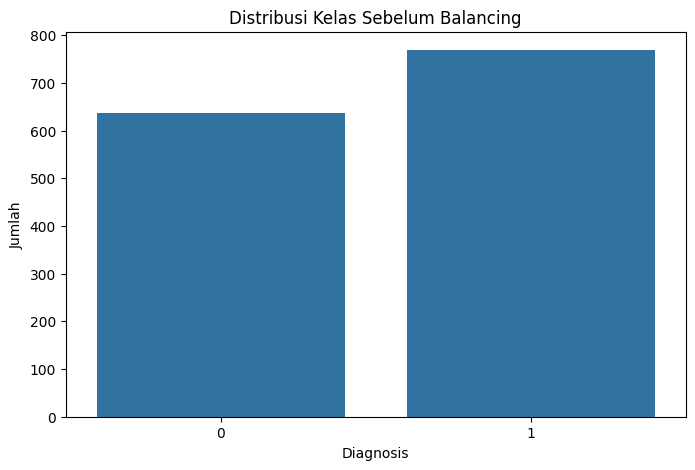


Distribusi data setelah balancing:
0    769
1    769
Name: count, dtype: int64


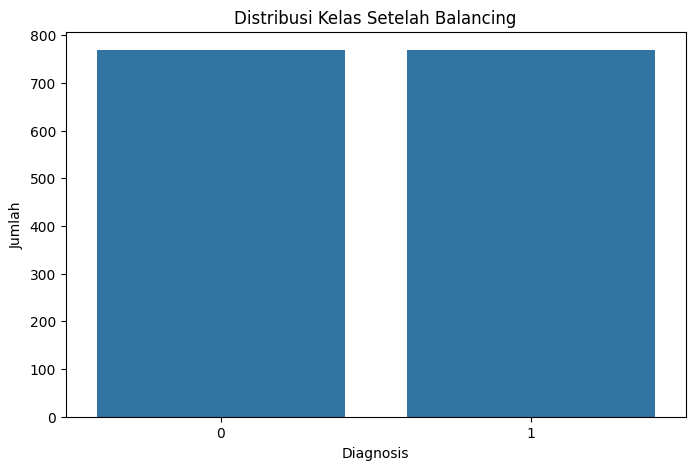

In [ ]:
# Import pustaka yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Menampilkan distribusi label diagnosis sebelum balancing
print("Distribusi data sebelum balancing:")
print(pd.Series(y_train).value_counts())

# Menampilkan bar plot distribusi data sebelum balancing
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train)
plt.title("Distribusi Kelas Sebelum Balancing")
plt.xlabel("Diagnosis")
plt.ylabel("Jumlah")
plt.show()

# Lakukan oversampling dengan SMOTE untuk menyeimbangkan data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Menampilkan distribusi label diagnosis setelah balancing
print("\nDistribusi data setelah balancing:")
print(pd.Series(y_train_balanced).value_counts())

# Menampilkan bar plot distribusi data setelah balancing
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_balanced)
plt.title("Distribusi Kelas Setelah Balancing")
plt.xlabel("Diagnosis")
plt.ylabel("Jumlah")
plt.show()


***A. Gunakan minimal 4 model Machine Learning dari library Spark untuk menyelesaikan masalah yang Anda pilih. 2 Model sesuai dengan instruksi (Random Forest, Gradient Boost Tree) dan dua model lain bebas (belum pernah dibahas). Lalu bandingkan hasilnya menggunakan metriks seperti AUC (ROC Curve), Akurasi, F1 Score, Presisi, dan Recall.***

In [ ]:
# Import pustaka yang diperlukan
import warnings
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, classification_report
import pandas as pd

# Menekan peringatan yang tidak diinginkan
warnings.filterwarnings("ignore")

# Dictionary untuk menampung model
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LGBM": LGBMClassifier(n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, random_state=42, verbose=0)
}

# Menyimpan hasil evaluasi model
results = {}

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    # Melatih model dengan data pelatihan
    model.fit(X_train_balanced, y_train_balanced)  # Menggunakan data yang telah diseimbangkan

    # Memprediksi hasil
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif

    # Menghitung metrik evaluasi
    auc = roc_auc_score(y_test, y_pred_proba)  # AUC menggunakan probabilitas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Menyimpan hasil evaluasi ke dictionary
    results[name] = {
        "AUC": auc,
        "Accuracy": accuracy,
        "F1": f1,
        "Precision": precision,
        "Recall": recall,
        "Classification Report": classification_report(y_test, y_pred)  # Menyimpan classification report
    }

# Mengubah hasil evaluasi ke dalam DataFrame untuk kemudahan tampilan
results_df = pd.DataFrame(results).T

# Menampilkan hasil evaluasi untuk setiap model
print(results_df)

# Menampilkan Classification Report per model
for name, metrics in results.items():
    print(f"\nClassification Report for {name}:\n")
    print(metrics["Classification Report"])  # Menampilkan classification report
    print("="*50)  # Separator antar model


[LightGBM] [Info] Number of positive: 769, number of negative: 769
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 1538, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                   AUC  Accuracy        F1 Precision    Recall  \
RandomForest  0.949149  0.881356   0.89426  0.902439  0.886228   
XGBoost       0.949149  0.891525  0.902439  0.919255  0.886228   
LGBM          0.953827  0.891525   0.90303   0.91411  0.892216   
CatBoost       0.96323  0.925424  0.934524  0.928994   0.94012   

                                          Classification Report  
RandomForest                precision    recall  f1-score   ...  
XGBoost                     precision  

***B. Dari ke-4 model classification tersebut, pilih dua model dengan performa terbaik dan lakukan hyperparameter tuning untuk melihat perubahan performa yang dihasilkan. Lalu tentukan model terbaik yang bisa menjadi solusi pada masalah yang Anda tetapkan diawal.***

In [ ]:
# Mengurutkan hasil berdasarkan AUC (model dengan AUC tertinggi dipilih)
best_models_auc = results_df.sort_values(by="AUC", ascending=False).head(2)

print("Dua Model Terbaik Berdasarkan AUC:")
print(best_models_auc)

Dua Model Terbaik Berdasarkan AUC:
               AUC  Accuracy        F1 Precision    Recall  \
CatBoost   0.96323  0.925424  0.934524  0.928994   0.94012   
LGBM      0.953827  0.891525   0.90303   0.91411  0.892216   

                                      Classification Report  
CatBoost                precision    recall  f1-score   ...  
LGBM                    precision    recall  f1-score   ...  


# ***CatBoost Hyperparameter Tuning:***

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

catboost_model = CatBoostClassifier(silent=True)
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [3, 5, 7],
}

grid_search_catboost = GridSearchCV(catboost_model, param_grid, cv=5, scoring='roc_auc')
grid_search_catboost.fit(X_train, y_train)
print(grid_search_catboost.best_params_)


{'depth': 10, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.01}


# ***LGBM Hyperparameter Tuning:***

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm_model = LGBMClassifier()
param_grid_lgbm = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'n_estimators': [100, 200, 500],
    'feature_fraction': [0.7, 0.8, 1.0],
}

grid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=5, scoring='roc_auc')
grid_search_lgbm.fit(X_train, y_train)
print(grid_search_lgbm.best_params_)


Output streaming akan dipotong hingga 5000 baris terakhir.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Evaluasi Model CatBoost setelah tuning
catboost_best_model = grid_search_catboost.best_estimator_
y_pred_catboost = catboost_best_model.predict(X_test)
y_pred_proba_catboost = catboost_best_model.predict_proba(X_test)[:, 1]  # Probabilitas untuk AUC

print("CatBoost Performance:")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba_catboost):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_catboost):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_catboost):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_catboost):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_catboost):.4f}")

# Evaluasi Model LGBM setelah tuning
lgbm_best_model = grid_search_lgbm.best_estimator_
y_pred_lgbm = lgbm_best_model.predict(X_test)
y_pred_proba_lgbm = lgbm_best_model.predict_proba(X_test)[:, 1]  # Probabilitas untuk AUC

print("\nLGBM Performance:")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba_lgbm):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgbm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgbm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lgbm):.4f}")


CatBoost Performance:
AUC: 0.9596
Accuracy: 0.9186
Precision: 0.9231
Recall: 0.9341
F1-Score: 0.9286
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0

LGBM Performance:
AUC: 0.9468
Accuracy: 0.9051
Precision: 0.9371
Recall: 0.8922
F1-Score: 0.9141


In [ ]:
# Menampilkan best model  CatBoost setelah tuning
print("Best CatBoost Model Parameters:")
print(grid_search_catboost.best_params_)


Best CatBoost Model Parameters:
{'depth': 10, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.01}


In [ ]:
from sklearn.metrics import classification_report

# Classification Report Model CatBoost setelah tuning
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       128
           1       0.92      0.93      0.93       167

    accuracy                           0.92       295
   macro avg       0.92      0.92      0.92       295
weighted avg       0.92      0.92      0.92       295



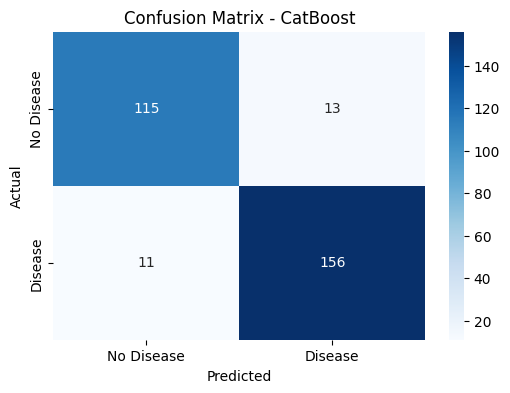

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix untuk Model CatBoost setelah tuning
cm_catboost = confusion_matrix(y_test, y_pred_catboost)

# Plot Confusion Matrix untuk CatBoost
plt.figure(figsize=(6, 4))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - CatBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

***Jabarkan karakteristik model terbaik yang Anda dapatkan terhadap korelasinya dengan data. Apakah ada sifat tertentu dari data yang ternyata cocok dengan model dan sebaliknya?***

CatBoost terbukti menjadi model yang sangat efektif untuk dataset ini karena memiliki kemampuan luar biasa dalam menangani data dengan berbagai jenis fitur, baik yang kategorikal maupun numerik. Dalam dataset ini, banyak fitur seperti jenis kelamin, merokok, diabetes, hipertensi, dan risiko genetik yang bersifat kategorikal, dan CatBoost mampu menangani fitur-fitur ini dengan sangat baik tanpa memerlukan pengolahan data tambahan seperti encoding. Selain itu, CatBoost dapat mengelola data dengan nilai yang hilang, yang sering kali ditemukan pada fitur seperti BMI atau aktivitas fisik, tanpa mempengaruhi performa model secara signifikan.

Keunggulan lainnya adalah kemampuan CatBoost dalam menangkap hubungan non-linear antara berbagai fitur. Misalnya, BMI yang berhubungan dengan konsumsi alkohol dan diabetes sangat mempengaruhi risiko penyakit hati, dan CatBoost dapat mengenali pola-pola kompleks ini dengan efektif. Selain itu, model ini sangat baik dalam menghindari overfitting, yang penting ketika berhadapan dengan data kesehatan yang sering memiliki noise atau variabilitas tinggi. CatBoost juga mampu menjaga keseimbangan antara precision dan recall, meskipun dataset ini memiliki distribusi kelas yang tidak seimbang.

Secara keseluruhan, CatBoost sangat cocok untuk masalah ini karena kemampuannya menangani berbagai tipe data dan interaksi antar fitur, serta memberikan hasil yang akurat meskipun data memiliki kompleksitas tinggi. Model ini berhasil memprediksi risiko penyakit hati dengan baik, membuatnya menjadi solusi terbaik untuk permasalahan yang dihadapi dalam dataset ini.